In [14]:
import pandas as pd
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from numpy import loadtxt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv("pima-indians-diabetes.csv")
display(df.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<Figure size 432x288 with 0 Axes>

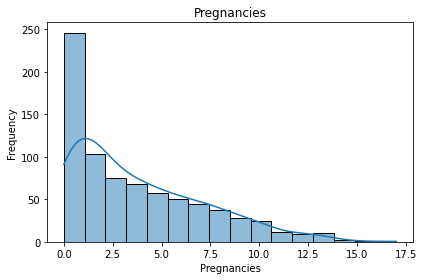

<Figure size 432x288 with 0 Axes>

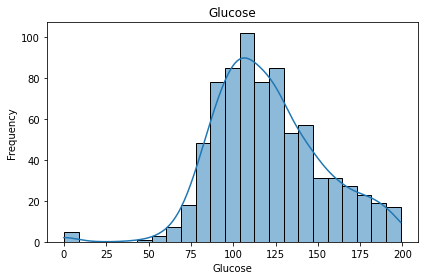

<Figure size 432x288 with 0 Axes>

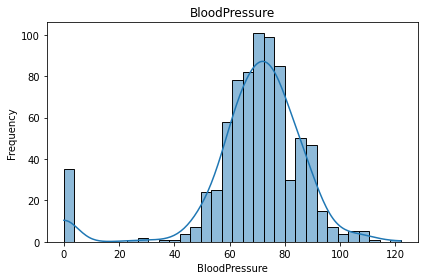

<Figure size 432x288 with 0 Axes>

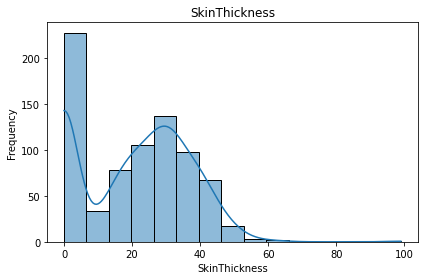

<Figure size 432x288 with 0 Axes>

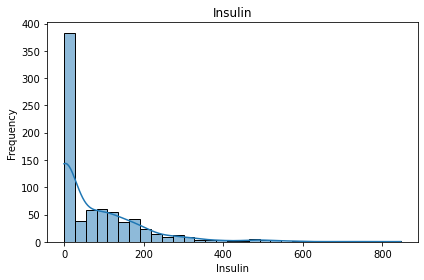

<Figure size 432x288 with 0 Axes>

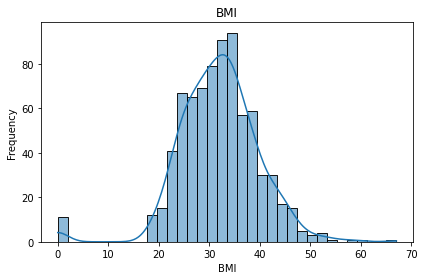

<Figure size 432x288 with 0 Axes>

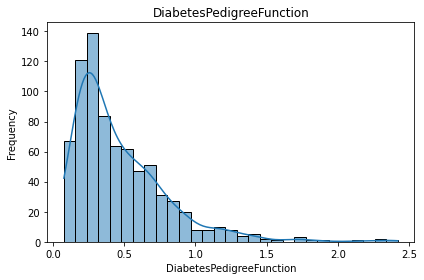

<Figure size 432x288 with 0 Axes>

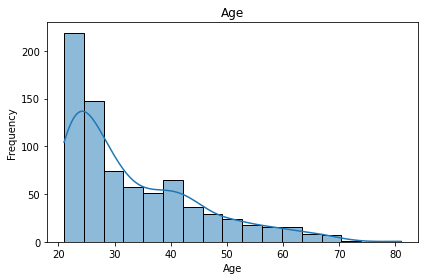

<Figure size 432x288 with 0 Axes>

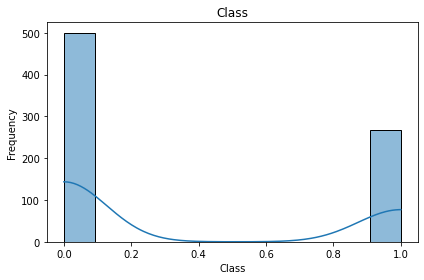

In [78]:
for i in df.columns:
    plt.figure()
    f, (ax_hist) = plt.subplots(1, sharex=True, layout='tight')
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.histplot(data = df[i], ax=ax_hist , kde=True)
    plt.title(i)
    plt.show()

In [16]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Class'],
      dtype='object')

<AxesSubplot:>

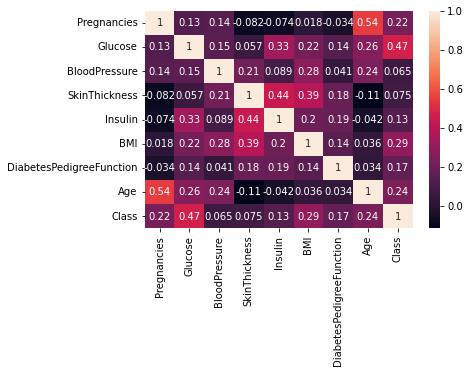

In [17]:
corr = df.corr()
sns.heatmap(corr, annot=True)

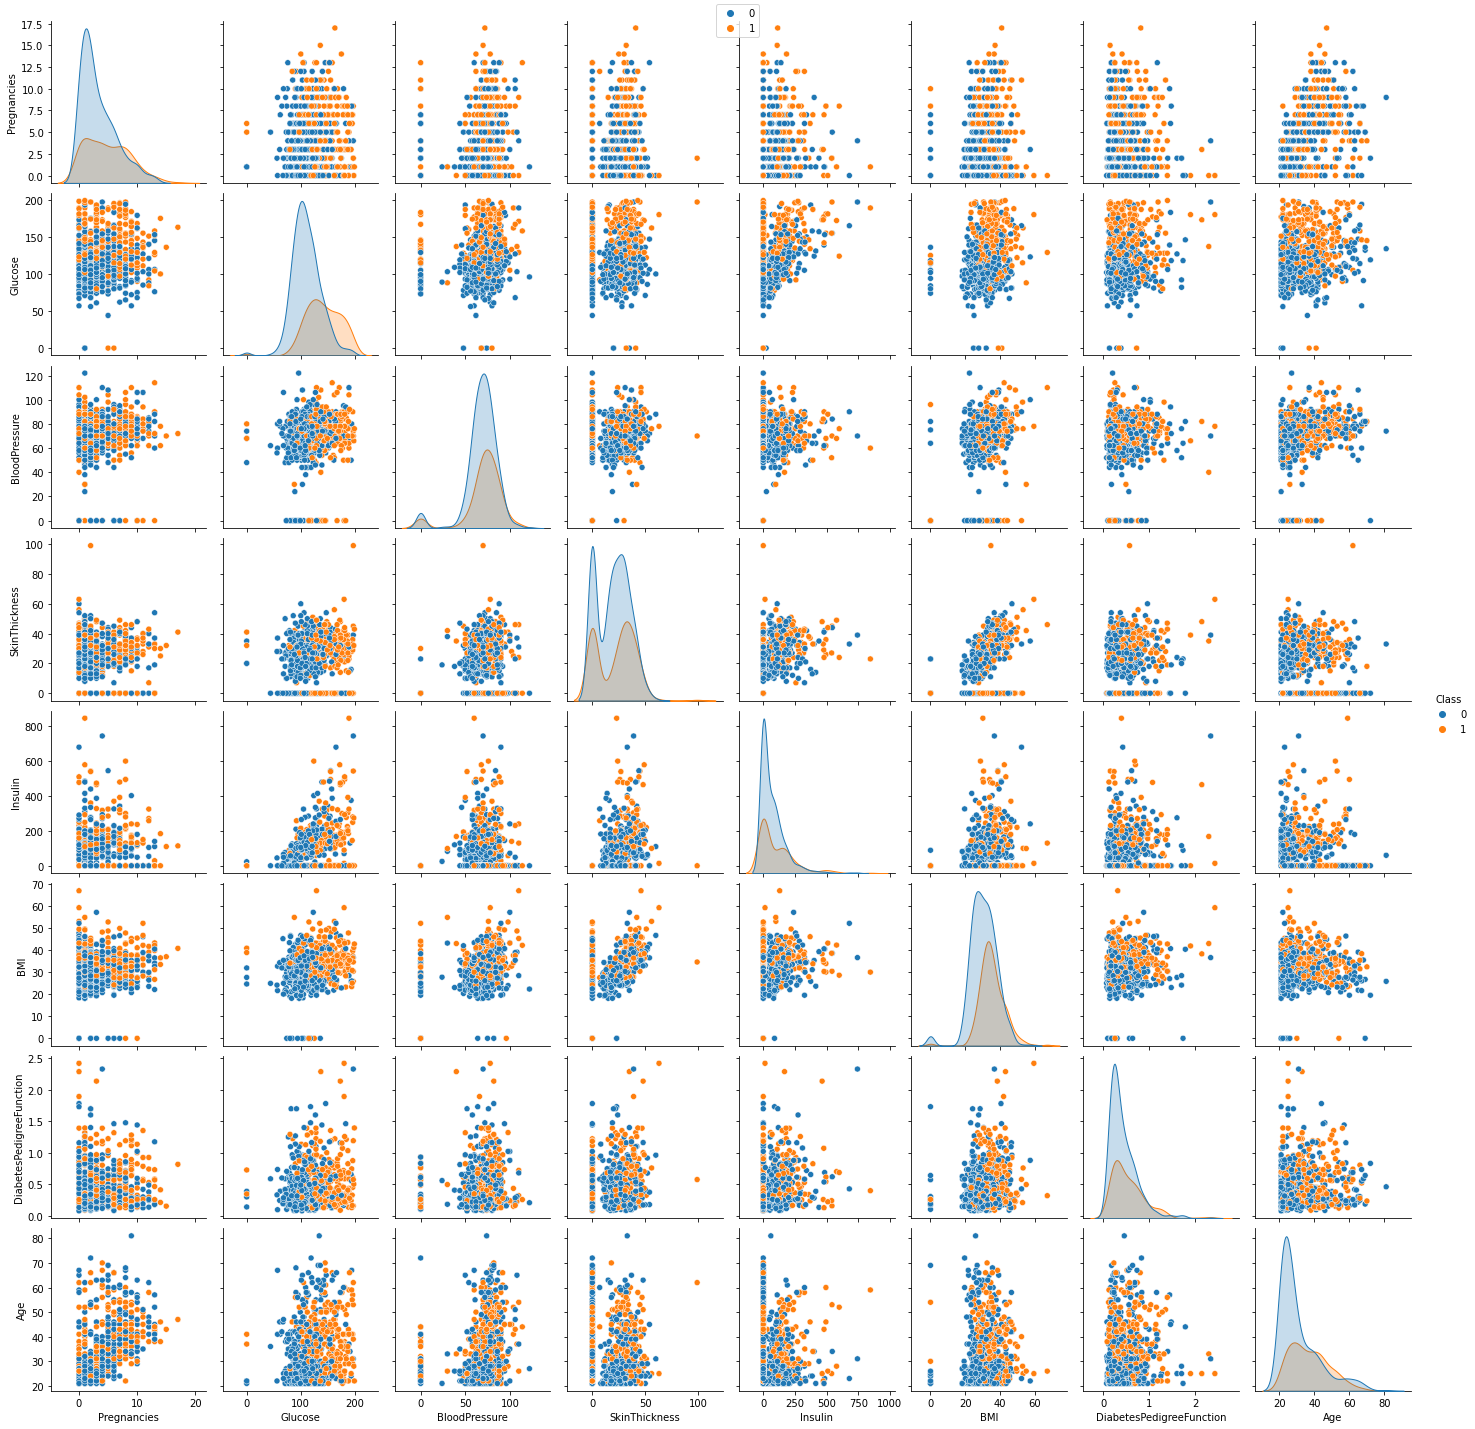

In [18]:
g = sns.pairplot(df, hue='Class')
handles = g._legend_data.values()
labels = g._legend_data.keys()
g.fig.legend(handles=handles, labels=labels, loc='upper center', ncol=1)

In [19]:
X = df.drop(['Class', 'SkinThickness', 'Insulin', 'Pregnancies'], axis=1)
y = df['Class']

In [20]:
X.head()

,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
0,148,72,33.6,0.627,50
1,85,66,26.6,0.351,31
2,183,64,23.3,0.672,32
3,89,66,28.1,0.167,21
4,137,40,43.1,2.288,33


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [22]:
D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)

In [23]:
param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 3} 

steps = 20  # The number of training iterations

In [24]:
model = xgb.train(param, D_train, steps)

[13:31:53] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [25]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))

Precision = 0.8202020202020202
Recall = 0.8153373123530476
Accuracy = 0.8311688311688312


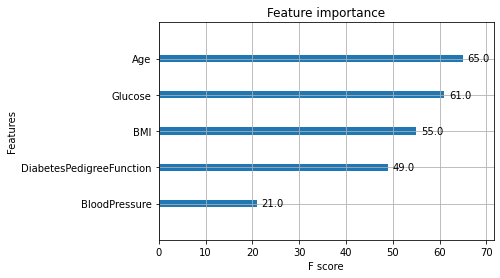

In [26]:
from xgboost import plot_importance

plot_importance(model)
plt.show()